# Lista 8 de Cálculo Numérico

In [1]:
using LinearAlgebra # Para uso da função norm
using Plots # para plotar gráficos

## Questão 1.

### a. Compressão (Thierry)

### Compressão de Dados em Matrizes

A ideia da compressão de dados é encontrarmos vetores base dentro da matriz tal que forneçam uma base para a composição de todos os dados. Porém, na vida real precisamos encontrar aproximações, visto que o uso de números reais acabam dificultando uma base L.I de poucos vetores representarem muitos dados.

Na ideia simples, transformamos a matriz em uma multiplicação de duas matrizes, tal que a primeira seja os vetores base e a segunda os coeficientes das combinações lineares.

Com a preocupação de se adequar aos números reais, começamos a analisar isso pelo erro da matriz original com a nova multiplicação das duas matrizes. Para quantificar o erro, usamos a ideia de norma de matriz, que é dada pela soma das normas de cada vetor (colunas) da matriz.

Então, temos que dado a matriz A e o vetor b, precisamos determinar c tal que 

$$min ||A - [b][c^T]|| \longrightarrow min ||[(a_1)(a_2)...(a_n)] - [c_1(b) c_2(b) ... c_n(b)]|| \longrightarrow ||(a_1 - c_1b)(a_2-c_2b)...(a_n-c_nb)||$$

Visto que $e_n = a_n - c_nb \space \bot \space c_nb$, pelo produto interno temos que $e_n^Tc_nb = 0 \longrightarrow (a_n - c_nb)^Tc_nb = 0$. Aplicando a transposta tal que $(M.Q)^T = Q^T.M^T$ e $(M - Q)^T = M^T - Q^T$ obtemos:

$$(a_n - c_nb)^Tc_nb = 0 \longrightarrow (a_n^T - (c_nb)^T)c_nb = 0 \longrightarrow a_n^Tc_nb - c_n^2b^Tb = 0 \longrightarrow a_n^Tc_nb = c_n^2b^Tb $$

Desconsiderando o caso em que $c_n = 0$ pois é um caso muito trivial, podemos dividir a equação em ambos os lados por $c_n$, resultando em:

$$a_n^Tb = c_nb^Tb \longrightarrow c_n = \frac{a_n^Tb}{b^Tb}$$

A partir da análise feita acima podemos escrever um código em Julia para achar o vetor c:

In [2]:
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m, n = size(A)
    A = 1.0 * A # multiplica-se por 1.0 para evitar erros de operações matriciais entre inteiros e float's.
    c = zeros(n)    
    c = A'*(b/(b'*b)) # Operação para achar o vetor c que minimiza a distância perpendicular à reta.
    return c
end

melhores_coords (generic function with 1 method)

In [3]:
A=[1.0001 10.001 3;2.01 20.3 6;3.003 30 9]

3×3 Matrix{Float64}:
 1.0001  10.001  3.0
 2.01    20.3    6.0
 3.003   30.0    9.0

In [4]:
b=[1;2;3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
c=melhores_coords(A,b)

3-element Vector{Float64}:
  1.0020785714285714
 10.04292857142857
  3.0

In [6]:
norm(A-b*c')

0.2534747564213406

In [7]:
function acha_melhor_minimizacao(A)
    n,m = size(A)

    bv = randn(n)
    cv = randn(m)
    
    bw = zeros(m)
    cw = zeros(n)
    
    for i in 1:50
        cv=melhores_coords(A, bv)
        bw=cv
        cw=melhores_coords(A', bw)
        bv=cw
    end
    
    return bv,cv
end

acha_melhor_minimizacao (generic function with 1 method)

In [8]:
function compressao(A,nível)
    m,n=size(A)
    B=zeros(m,nível)
    C=zeros(n,nível)
    
    for i=1:nível
        B[:,i], C[:,i] = acha_melhor_minimizacao(A)
        A= A - B[:,i]*C[:,i]'
    end
    return B,C
end

compressao (generic function with 1 method)

In [9]:
A = randn(3,4)

3×4 Matrix{Float64}:
  0.182218  -0.33242   -0.502464  -0.0375348
  0.338344   0.432014   0.786979  -0.635384
 -2.42778    0.524296  -0.40184    0.0825059

In [10]:
B,C = compressao(A,3)

([-0.15985916164375394 -0.8938282217488407 -36.580085969548; -0.5258487622700672 1.7487244793107817 -17.90134068546107; 2.9182624177363845 0.26614397940850476 -5.229502194737669], [-0.8269087278706225 -0.055334206319940495 -1.5589375282513916e-5; 0.1537706688745356 0.3035132645759041 0.0009991799586727915; -0.17080155053300672 0.4374917357612611 0.0037923950733646443; 0.06587305147552087 -0.2687519198205382 0.007305132932682391])

In [11]:
norm(A-B*C')

2.666738892289582e-16

In [12]:
# Chance pequena de existirem colunas Linearmente Dependentes
N = 20
A = randn(N, N)
for i in 1:N
    B,C = compressao(A, i)
    print(i, ": ", norm(A-B*C'), "\n")
end

1: 18.073926043189942
2: 16.535382201837145
3: 14.91203852168224
4: 13.27928344113662
5: 11.599713647829569
6: 10.461143810831196
7: 9.226449563208618
8: 8.000113206579945
9: 6.935863882862863
10: 5.900683958542548
11: 5.018045193329368
12: 4.159417014694531
13: 3.4073369912456064
14: 2.4826207090152734
15: 1.7583059808720283
16: 1.32395802117042
17: 0.7041931290916649
18: 0.19259728305475432
19: 0.056941274379503276
20: 4.7716885407952754e-15


In [13]:
N = 20
A = zeros(N, N)
for i in 1:N
    A[:, i] .= i
end
for i in 1:10
    B,C = compressao(A, i)
    print(norm(A-B*C'), "\n")
end

3.794299872214038e-14
0.0
0.0
NaN
NaN
NaN
NaN
NaN
NaN
NaN


### b. Gauss-Jacobi (Vinicius)

O método utilizado será o do ponto fixo, em que iniciamos com o sistema linear:

$$A.x=b$$

Chamaremos $A=M-K$ para um $M$ facilmente invertível e um $K$ resto da matriz.

$$M.x-K.x=b \\
M.x=b+K.x \\
x=M^{-1}.b+M^{-1}.K.x$$

Chamaremos $M^{-1}.b$ de $c$ e o $M^{-1}.K$ de $R$:

$$x=R.x+c$$

Nosso método numérico a ser implementado em cima dessa equação é dar um chute inicial e ir substituindo nela:

$$x^{(0)}=chute_{inicial}$$

$$x^{(k+1)}=R.x^{(k)}+c$$

No caso específico do **Gauss-Jacobi**, a **matriz $M$ facilmente inversível é uma diagonal.**

In [14]:
# nao esta funcionando bem
function gauss_jacobi(A,b,iteracoes)
    M = Diagonal(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    println(M)
    println(K)
    println(R)
    println(c)
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_jacobi (generic function with 1 method)

In [15]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

[4 0 0; 0 5 0; 0 0 10]
[0 -2 -1; -1 0 -1; -3 -4 0]
[0.0 -0.5 -0.25; -0.2 0.0 -0.2; -0.30000000000000004 -0.4 0.0]
[1.75, 1.4000000000000001, 1.7000000000000002]
Norma: 8.881784197001252e-16


In [16]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

[5 0 0 0; 0 3 0 0; 0 0 4 0; 0 0 0 8]
[0 -2 -1 1; -1 0 1 -1; -2 0 0 -1; -1 -1 -1 0]
[0.0 -0.4 -0.2 0.2; -0.3333333333333333 0.0 0.3333333333333333 -0.3333333333333333; -0.5 0.0 0.0 -0.25; -0.125 -0.125 -0.125 0.0]
[0.2, -0.3333333333333333, 0.25, -0.375]
Norma: 1.1102230246251565e-16


### c. Gauss-Seidel (Vinicius)

In [17]:
# nao esta funcionando bem
function gauss_seidel(A,b,iteracoes)
    M = UpperTriangular(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    println(M)
    println(K)
    println(R)
    println(c)
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_seidel (generic function with 1 method)

In [18]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

[4 2 1; 0 5 1; 0 0 10]
[0 0 0; -1 0 0; -3 -4 0]
[0.14500000000000002 0.06 0.0; -0.14 0.08000000000000002 0.0; -0.30000000000000004 -0.4 0.0]
[0.7949999999999998, 1.06, 1.7000000000000002]
Norma: 8.881784197001252e-16


In [19]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

[5 2 1 -1; 0 3 -1 1; 0 0 4 1; 0 0 0 8]
[0 0 0 0; -1 0 0 0; -2 0 0 0; -1 -1 -1 0]
[0.24791666666666667 -0.05208333333333333 -0.05208333333333333 0.0; -0.4479166666666667 0.05208333333333333 0.05208333333333333 0.0; -0.46875 0.03125 0.03125 0.0; -0.125 -0.125 -0.125 0.0]
[0.09375000000000006, -0.09375, 0.34375, -0.375]
Norma: 2.220446049250313e-16


## Questão 2. (Thierry)

## Questão 3. (Chris)

## Questão 4. (Thierry)

## Questão 5. (Chris)

## Questão 6. (Luan)

## Questão 7. (Vinicius)

Primeiro, fazemos a inserção da imagem:

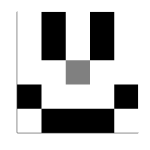

In [20]:
imagem = [0 1 0 1 0 ; 0 1 0 1 0 ; 0 0 0.5 0 0 ; 1 0 0 0 1 ; 0 1 1 1 0]
plot(Gray.(1 .- imagem), size=(150,150), axis=nothing)

Podemos descobrir o posto da imagem através da função rank:

In [21]:
rank(imagem)

3

Para níveis de compressão abaixo do posto da imagem, a nitidez é prejudicada:

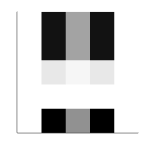

In [22]:
B,c = compressao(imagem, 1)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

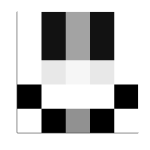

In [23]:
B,c = compressao(imagem, 2)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

A partir do nível de compressão igual ao posto da imagem a nitidez é mantida como a original.

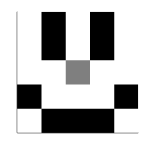

In [24]:
B,c = compressao(imagem, 3)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

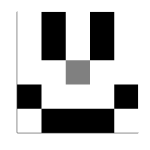

In [25]:
B,c = compressao(imagem, 4)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

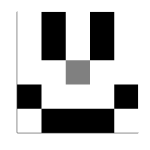

In [26]:
B,c = compressao(imagem, 5)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

## Questão 8. (Luan)